## Kinematic Bicycle Model
----
### Input to Model

The model accepts:

1. Velocity 
2. Steering Rate 

Steps through the bicycle kinematic equations.


### Objective

Once the model is implemented, you will provide a set of inputs to drive the bicycle in a figure 8 trajectory.

### Bicycle Kinematics

The bicycle kinematics are governed by the following set of equations:

\begin{align*}
\dot{x}_c &= v \cos{(\theta + \beta)} \\
\dot{y}_c &= v \sin{(\theta + \beta)} \\
\dot{\theta} &= \frac{v \cos{\beta} \tan{\delta}}{L} \\
\dot{\delta} &= \omega \\
\beta &= \tan^{-1}(\frac{l_r \tan{\delta}}{L})
\end{align*}

Where the inputs are,

$v$ - Bicycle Speed

$\omega$ - Steering Angle Rate

The input can also directly be the steering angle $\delta$ rather than its rate in the simplified case. The Python model will allow us both implementations.

In order to create this model, it's a good idea to make use of Python class objects. This allows us to store the state variables as well as make functions for implementing the bicycle kinematics. 

### Initial Conditions

The bicycle begins with zero initial conditions:
 1. Maximum turning rate of **1.22 rad/s**.
 2. Wheelbase Length of **2m**.
 3. Length of **1.2m** to its center of mass from the rear axle.
 4. Sample time = **10ms** (for numerical integration).
 5. Reset function which sets all the state variables back to 0. 


From these conditions, we initialize the Python class as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class Bicycle():
    def __init__(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0
        
        self.L = 2
        self.lr = 1.2
        self.w_max = 1.22
        
        self.sample_time = 0.01
        
    def reset(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.delta = 0
        self.beta = 0

In [2]:
class Bicycle(Bicycle):
    # Our ODEs have input of bicycle speed and angular speed
    def ODE(self, v, w):
        # ==================================
        #  Kinematic Model
        # ==================================
        
        # For implementing the Differential Equations
        xc_dot = v * np.cos(self.theta + self.beta)
        yc_dot = v * np.sin (self.theta + self.beta)
        theta_dot = (v*np.cos(self.beta) * np.tan(self.delta))/(self.L)
        delta_dot = w
        self.beta = np.arctan((self.lr*np.tan(self.delta))/(self.L))
        
        # The equations need to be updated with sampling time
        self.xc += xc_dot * self.sample_time
        self.yc += yc_dot * self.sample_time
        self.theta += theta_dot * self.sample_time
        self.delta += delta_dot * self.sample_time


### Trajectory Planning

### Circle

##### 1. Steering Angle (**delta**)
We want to travel a circle of radius 10 m in 20 seconds. The desired steering angle can be computed.

\begin{align*}
    \tan{\delta} &= \frac{L}{r} \\
    \delta &= \tan^{-1}(\frac{L}{r}) \\
           &= \tan^{-1}(\frac{2}{10}) \\
           &= 0.1974
\end{align*}

**NOTE:** If the steering angle is directly set to 0.1974 using a simplied bicycled model, then the bicycle will travel in a circle without requiring any additional steering input. 

##### 2. Linear Speed (**v**)

The desired **speed** can be computed from the circumference of the circle:

\begin{align*}
    v &= \frac{d}{t}\\
     &= \frac{2 \pi 10}{20}\\
     &= \pi
\end{align*}

We can now implement this in a loop to step through the model equations.

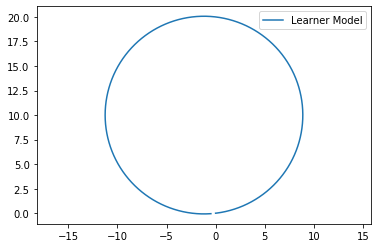

In [3]:
sample_time = 0.01
time_end = 20
model = Bicycle()
t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)

# We are setting Delta directly for a simplified bicycle model 
# by doing this it will travel in a circle without requiring additional steering inputs
# Here Lenght of Bicycle = 2 
# and Radius of the circle to be covevered is = 10
model.delta = np.arctan(2/10)

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    # Here we are sending a constant input of
    # v = 3.14 m/s
    # w = 0 rad/sec
    model.ODE(np.pi, 0)
    #model.beta = 0

plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.legend()
plt.show()

**OBSERVATIONS**
1. The plot above shows the desired circle of 10m radius.
2. **The path is slightly offset which is caused by the sideslip effects due to** $\beta$. 
3. By forcing $\beta = 0$ through uncommenting the last line in the loop the offset disappears and the **circle becomes centered at (0,10).**

However, in practice the **steering angle ($\beta$) cannot be directly set and must be changed through angular rate inputs $\omega$.** 


Below corrects for this and sets angular rate inputs to generate the same circle trajectory. The speed $v$ is still maintained at $\pi$ m/s.

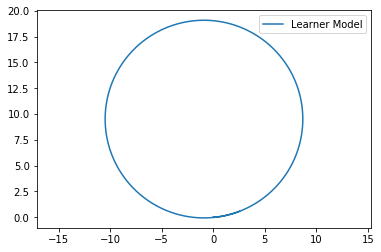

In [4]:
sample_time = 0.01
time_end = 20
model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)

for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    
    # When delta < 0.1974
    # v = 3.14 m/s
    # w = 1.22 rad/sec
    # When delta NOT < 0.1974 
    # v = 3.14 m/s
    # w = 0 rad/sec
    if model.delta < np.arctan(2/10):
        model.ODE(np.pi, model.w_max)
    else:
        model.ODE(np.pi, 0)
        
plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.legend()
plt.show()

Other Trajectories
1. Square Path
2. Spiral Path
3. Wave Path

(Uncomment each section to view)

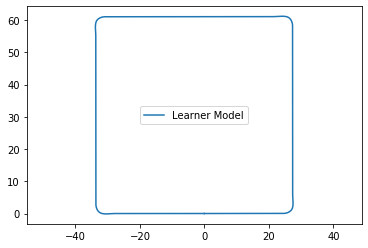

In [5]:
sample_time = 0.01
time_end = 60
model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)


# Previously we calculated that for L (bicycle) = 2m and covering circle r = 10m in t = 20 sec
# delta = 0.197 with v = 3.14 m/s
# Now for a different shape we want:
# v = 4 m/s and t = 60sec
# As t_sample = 0.01 and we are stepping iteratively we are creating an array with a size = sampling size
# and filling v = 4m/s for every sampling time and w = 0


# maintain velocity at 4 m/s
v_data = np.zeros_like(t_data)
v_data[:] = 4 
w_data = np.zeros_like(t_data)


# ==================================
#  Square Path: set w at corners only
# ==================================

# Here we know that to form a square on at the corners we have to turn 
# meaning the linear velocity will still be v = 4
# but now as we approach a corner (4 corners) 6000/4 = 1500
# we start at the middle of the side of a square there fore in 600 steps is the first turn
# we keep turning for 100 steps and then correct our turn for 100 steps
# That is Turn from 600 to 700 and straight 700
# second corner is at 2100 then 3600 then 5100

w_data[600:600+100] = 0.753
w_data[600+100:600+100*2] = -0.753
w_data[2100:2100+100] = 0.753
w_data[2100+100:2100+100*2] = -0.753
w_data[3600:3600+100] = 0.753
w_data[3600+100:3600+100*2] = -0.753
w_data[5100:5100+100] = 0.753
w_data[5100+100:5100+100*2] = -0.753

# ==================================
#  Spiral Path: high positive w, then small negative w
# ==================================
#w_data[:] = -1/100
#w_data[0:100] = 1

# ==================================
#  Wave Path: square wave w input
# ==================================
#w_data[:] = 0
#w_data[0:100] = 1
#w_data[100:300] = -1
#w_data[300:500] = 1
#w_data[500:5700] = np.tile(w_data[100:500], 13)
#w_data[5700:] = -1

# ==================================
#  Step through bicycle model
# ==================================
for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    
    # Here we are supplying our ODEs with the inputs linear speed and angular speed
    model.ODE(v_data[i], w_data[i])

        
plt.axis('equal')
plt.plot(x_data, y_data,label='Learner Model')
plt.legend()
plt.show()

We would now like the bicycle to travel a figure eight trajectory. Both circles in the figure eight have a radius of 8m and the path should complete in 30 seconds. The path begins at the bottom of the left circle and is shown in the figure below:

![title](figure8.png)

Determine the speed and steering rate inputs required to produce such trajectory and implement in the cell below. Make sure to also save your inputs into the arrays v_data and w_data, these will be used to grade your solution. The cell below also plots the trajectory generated by your own model.

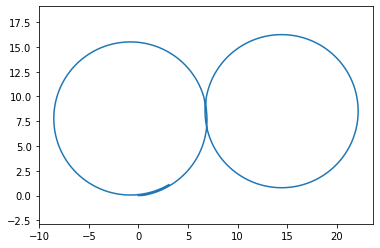

In [74]:
sample_time = 0.01
time_end = 30
model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)
w_data = np.zeros_like(t_data)


# ==================================
#  Learner solution begins here
# ==================================
rad = 8
delta = np.arctan(2/8)
v_data[:] =2*(2*np.pi*rad)/time_end
w_data[:] = 0

for i in range(t_data.shape[0]):
    
    x_data[i] = model.xc
    y_data[i] = model.yc
    
    # Here we are supplying our ODEs with the inputs linear speed and angular speed
    # We will divide the 3000 steps we have into 8 sections = 375 per section
    # In figure we start at the bottom of the circle, we need to complete 1/4
    # of circle in 375 steps
    # if modeldelta < delta required to prescribe a circle 
    # we force model delta to be max possible
    # Ex. we are riding a bicycle and trying to make a circle and we are at a point going tangential to circle
    # What will we do ? we will turn the handle in the dir of circle
    if i < 375-10:
        if model.delta < delta:
            model.ODE(v_data[i], model.w_max)            
        # if the modeldlta is going as per req the angular velocity is zero
        else:
            model.ODE(v_data[i], 0)
            
    # After completing 1/4 of circle we need to turn and make 1 whole circle 
    # That is from 375 to 375*5 
    # in this time frame we need to make 1 whole circle but in opposite direction
    # if model.delta > -delta (needed for opposite circle)
    # we change the direction of angular velocity 
    elif 375-10 <= i <= 375*5-60:
        if model.delta > -delta:
            model.ODE(v_data[i], -model.w_max)            
        else:
            model.ODE(v_data[i], 0)
                
    elif 375*5-60 <= i <= 375*8:
        if model.delta < delta:
            model.ODE(v_data[i], model.w_max)            
        else:
            model.ODE(v_data[i], 0)
    
# ==================================
#  Learner solution ends here
# ==================================
plt.axis('equal')
plt.plot(x_data, y_data)
plt.show()


We will now run your speed and angular rate inputs through our bicycle model solution. This is to ensure that your trajectory is correct along with your model. The cell below will display the path generated by our model along with some waypoints on a desired figure 8. Surrounding these waypoints are error tolerance circles with radius 1.5m, your solution will pass the grader if the trajectory generated stays within 80% of these circles.

In [5]:
grade_bicycle(t_data,v_data,w_data)

NameError: name 'grade_bicycle' is not defined

The cell below will save the time and vehicle inputs as text file named $\textit{figure8.txt}$. To locate the file, change the end of your web directory to $\textit{/notebooks/Course_1_Module_4/figure8.txt}$

Once you are there, you can download the file and submit to the Coursera grader to complete this assessment.

In [ ]:
data = np.vstack([t_data, v_data, w_data]).T
np.savetxt('figure8.txt', data, delimiter=', ')

Congratulations! You have now completed the assessment! Feel free to test the bicycle model with different inputs in the cell below, and see what trajectories they form. For example, try moving in an equilateral triangle. You'll find that it's rather difficult to generate desired trajectories by pre-setting the inputs. The next module on vehicle control will show you an easier and more accurate method. See you there!

In [ ]:
sample_time = 0.01
time_end = 30
model.reset()

t_data = np.arange(0,time_end,sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)
v_data = np.zeros_like(t_data)
w_data = np.zeros_like(t_data)

# ==================================
#  Test various inputs here
# ==================================
for i in range(t_data.shape[0]):

    model.step(v_data[i], w_data[i])
    
plt.axis('equal')
plt.plot(x_data, y_data)
plt.show()